In [37]:
import astropy
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt

In [20]:
test = fits.open("nu60802031004A01_cl.evt")

In [21]:
test.info()

Filename: nu60802031004A01_cl.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      92   ()      
  1  EVENTS        1 BinTableHDU    453   134792R x 39C   [1D, 1D, 1J, 1J, 1J, 9I, 9I, 1D, 9X, 1B, 1B, 1B, 1B, 1B, 1B, 1B, 1B, 1B, 1B, 1B, 16X, 8X, 8X, 9I, 9E, 9E, 9E, 1I, 9B, 9E, 1J, 1E, 1J, 1I, 1I, 1I, 1I, 1I, 1I]   
  2  GTI           1 BinTableHDU     91   275R x 2C   [1D, 1D]   
  3  BADPIX        1 BinTableHDU    116   33R x 5C   [1B, 1B, 1D, 1D, 16X]   
  4  BADPIX        2 BinTableHDU    116   57R x 5C   [1B, 1B, 1D, 1D, 16X]   
  5  BADPIX        3 BinTableHDU    116   56R x 5C   [1B, 1B, 1D, 1D, 16X]   
  6  BADPIX        4 BinTableHDU    157   137R x 5C   [1B, 1B, 1D, 1D, 16X]   


In [26]:
test[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
TELESCOP= 'NuSTAR  '           / Telescope (mission) name                       
INSTRUME= 'FPMA    '           / Instrument name                                
OBS_ID  = '60802031004'        / Observation ID                                 
TARG_ID =                    0 / Target ID                                      
OBJECT  = 'M87     '           / Name of observed object                        
RA_OBJ  =            187.70592 / [deg] R.A. Object                              
DEC_OBJ =             12.391

In [29]:
events = test['EVENTS'].data

In [31]:
events

FITS_rec([(4.50387531e+08, 0.01124634, -146, 60, 774998, [3355, 5563, 2888, 3309, 4760, 4558, 6620, 6774, 5394], [3357, 5593, 2892, 3324, 5166, 4576, 6638, 6768, 5425], 7.41102431e-04, [False, False, False, False, True, False, False, False, False], 0, 4, 1, 26, 9, 1, 0, 0, 0, 0, 0, [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False], [False, False, False, False, False, False, False, False], [2, 30, 4, 15, 406, 18, 18, -6, 31], [-1.1100000e+01,  1.0100000e+01, -7.0000000e+00,  6.9999981e-01,  3.9010001e+02,  1.7999992e+00, -4.2999992e+00, -2.8400000e+01,  1.3900000e+01], [-1.1056785e+01,  1.0060678e+01, -6.9727468e+00,  6.9727451e-01,  3.8858121e+02,  1.7929913e+00, -4.2832580e+00, -2.8289429e+01,  1.3845882e+01], [-1.1056785e+01,  1.0060678e+01, -6.9727468e+00,  6.9727451e-01,  3.9160687e+02,  1.7929913e+00, -4.2832580e+00, -2.8289429e+01,  1.3845882e+01], 0, [0, 0, 0,

In [35]:
time = events['TIME']    
pi = events['PI']   

# Define energy range (PI channels)
# NuSTAR: 1 PI ~ 0.04 keV, so PI 75-1909 corresponds to ~3-79 keV
energy_min_pi = 75    # ~3 keV
energy_max_pi = 1909  # ~79 keV

# Filter events by energy
energy_mask = (pi >= energy_min_pi) & (pi <= energy_max_pi)
filtered_time = time[energy_mask]

print(f"Events in energy range: {len(filtered_time)}")

# Create light curve with specified bin size
bin_size = 100  # seconds (adjust as needed)

# Create time bins
time_bins = np.arange(time.min(), time.max() + bin_size, bin_size)

# Bin the events
counts, bin_edges = np.histogram(filtered_time, bins=time_bins)

# Calculate bin centers and count rates
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
count_rate = counts / bin_size

# Convert to time since observation start
time_since_start = bin_centers - time.min()

print(f"Number of time bins: {len(counts)}")
print(f"Mean count rate: {count_rate.mean():.2f} counts/s")

Events in energy range: 65090
Number of time bins: 1128
Mean count rate: 0.58 counts/s


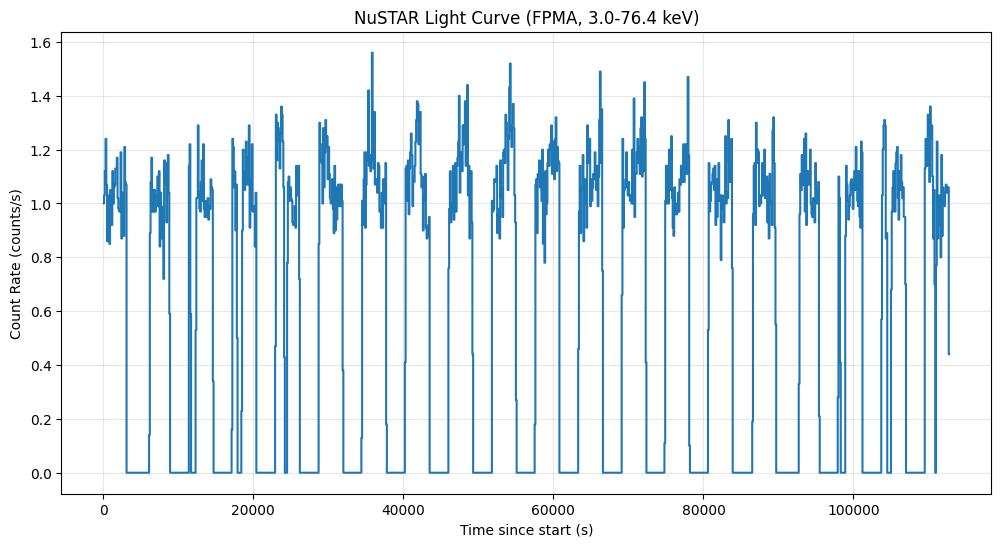

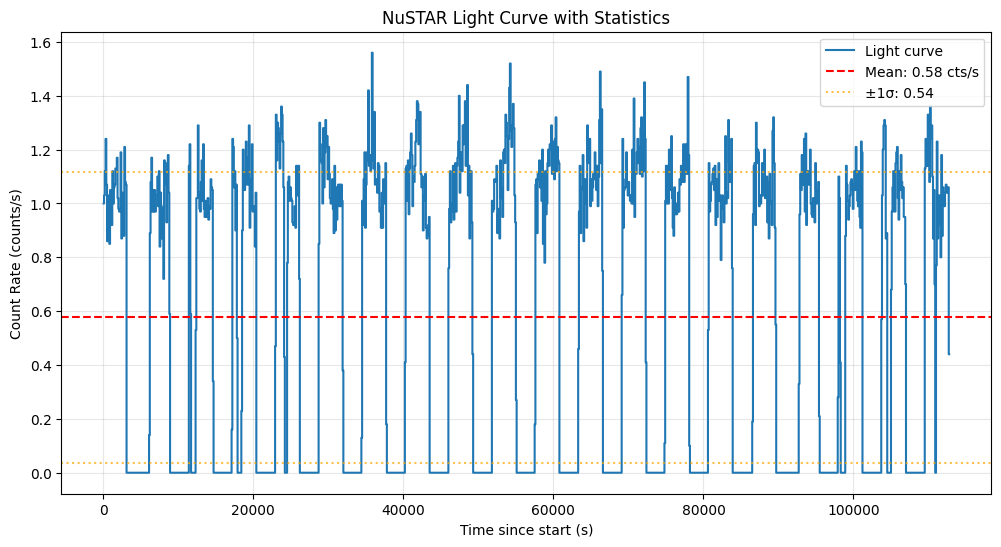

In [38]:
# Simple light curve plot
plt.figure(figsize=(12, 6))
plt.step(time_since_start, count_rate, where='mid')
plt.xlabel('Time since start (s)')
plt.ylabel('Count Rate (counts/s)')
plt.title(f'NuSTAR Light Curve (FPMA, {energy_min_pi*0.04:.1f}-{energy_max_pi*0.04:.1f} keV)')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate statistics
mean_rate = count_rate.mean()
std_rate = count_rate.std()

plt.figure(figsize=(12, 6))
plt.step(time_since_start, count_rate, where='mid', label='Light curve')
plt.axhline(mean_rate, color='r', linestyle='--', label=f'Mean: {mean_rate:.2f} cts/s')
plt.axhline(mean_rate + std_rate, color='orange', linestyle=':', alpha=0.7)
plt.axhline(mean_rate - std_rate, color='orange', linestyle=':', alpha=0.7, 
            label=f'±1σ: {std_rate:.2f}')
plt.xlabel('Time since start (s)')
plt.ylabel('Count Rate (counts/s)')
plt.title('NuSTAR Light Curve with Statistics')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()